# Assignment 2 - Η Στήλη της Ροζέτας του Ανθρώπινου Κεφαλαίου

## Ε1: Εισόδημα και Αποτελέσματα των Τεστ

Εισάγουμε τις βιβλιοθήκες που θα χρειαστούμε στη συνέχεια:

In [1]:
import pandas as pd
from openpyxl import workbook

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats as stats

Αρχικά διαβάζουμε το αρχείο **patel-sandefur-human-capital-final-results.xlsx** σε ένα dataframe *country_scores* (θα διαβάσουμε το συγκεκριμένο sheet που μας ενδιαφέρει):

In [2]:
datafile_1 = 'patel-sandefur-human-capital-final-results.xlsx'
country_scores = pd.read_excel(datafile_1, sheet_name=1)
country_scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


Στη συνέχεια θα πάρουμε τα data του **WDI_data.csv** σε ένα άλλο dataframe *wdi*:

In [3]:
datafile_2 = 'WDI_data.csv'
wdi = pd.read_csv(datafile_2)
wdi

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN
795,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


Απο τα δεδομενα της Παγκοσμιας Τραπεζας θα κρατησουμε μονο το *GDP per capita* της στήλης *Series Code*:

In [4]:
wdi_gdp = wdi[wdi['Series Code'] == 'NY.GDP.PCAP.PP.KD']
wdi_gdp


,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
9,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
12,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
...,...,...,...,...,...
777,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4339.10369305975
780,World,WLD,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14766.537605517
783,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357
786,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.20204093772


Θα μετονομάσουμε την στήλη *2015 [YR2015]* σε *GDP* για μεγαλύτερη ευκολία αργότερα

In [5]:
wdi_gdp.rename(columns = {'2015 [YR2015]':'GDP'}, inplace = True)
wdi_gdp

C:\Users\apmou\AppData\Local\Temp\ipykernel_12332\594579345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country Name,Country Code,Series Name,Series Code,GDP
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
9,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
12,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
...,...,...,...,...,...
777,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4339.10369305975
780,World,WLD,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14766.537605517
783,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357
786,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.20204093772


Δημιουργούμε ένα νεο dataframe εννωνοντας τα *country_scores* και *wdi_gdp* στη στήλη *country code*

In [6]:
DF1 = country_scores.merge(wdi_gdp, on=['Country Code']) 
DF1

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",Country Name,Series Name,Series Code,GDP
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,United Arab Emirates,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,65975.3755468552
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,Argentina,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19101.2973920688
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,Armenia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8195.93364956571
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,Australia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,43719.5021648696
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,Austria,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,44353.8752139122
...,...,...,...,...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN,Turkey,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,23388.4813019367
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608,Uruguay,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19831.4458942372
75,United States,USA,96.000000,97.517357,544.000000,560.000000,United States,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,53029.2933612438
76,Yemen,YEM,9.265388,NaN,243.000000,NaN,"Yemen, Rep.","GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357


Θα μετονομάσουμε και τις στήλες με τους δείκτες *TIMSS* και *PIRLS* για ευκολότερη αναφορά αργότερα

In [7]:
DF1.rename(columns = {'Median Math Score (TIMSS Scale, 4th Grade)':'TIMSS'}, inplace = True)
DF1.rename(columns = {'Median Reading Score (PIRLS Scale, 4th Grade)':'PIRLS'}, inplace = True)
DF1

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,Country Name,Series Name,Series Code,GDP
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,United Arab Emirates,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,65975.3755468552
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,Argentina,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19101.2973920688
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,Armenia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8195.93364956571
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,Australia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,43719.5021648696
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,Austria,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,44353.8752139122
...,...,...,...,...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN,Turkey,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,23388.4813019367
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608,Uruguay,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19831.4458942372
75,United States,USA,96.000000,97.517357,544.000000,560.000000,United States,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,53029.2933612438
76,Yemen,YEM,9.265388,NaN,243.000000,NaN,"Yemen, Rep.","GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357


Παρατηρουμε ότι έχουμε μερικά NaNs values στους δεικτες TIMSS και PIRLS. Είναι λίγα σε σχέση με το σύνολο οπότε θα αφησουμε εξω τις γραμμες με τα NaNs από τους δείκτες TIMSS και PIRLS. Θα δημιουργήσουμε 2 νέα dataframes, ένα για κάθε index χωρίς NaN values για τους δείκτες αυτούς. 

In [8]:
#TIMSS = DF1[DF1['TIMSS'].notna()]
#TIMSS

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,Country Name,Series Name,Series Code,GDP
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,United Arab Emirates,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,65975.3755468552
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,Argentina,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19101.2973920688
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,Armenia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8195.93364956571
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,Australia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,43719.5021648696
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,Austria,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,44353.8752139122
...,...,...,...,...,...,...,...,...,...,...
72,Tunisia,TUN,35.134598,NaN,362.000000,NaN,Tunisia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10749.8591674414
73,Turkey,TUR,77.000000,NaN,477.000000,NaN,Turkey,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,23388.4813019367
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608,Uruguay,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19831.4458942372
75,United States,USA,96.000000,97.517357,544.000000,560.000000,United States,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,53029.2933612438


In [9]:
#PIRLS = DF1[DF1['PIRLS'].notna()]
#PIRLS

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,Country Name,Series Name,Series Code,GDP
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,United Arab Emirates,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,65975.3755468552
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,Argentina,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19101.2973920688
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,Australia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,43719.5021648696
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,Austria,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,44353.8752139122
5,Azerbaijan,AZE,72.284508,81.859566,465.000000,467.000000,Azerbaijan,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,16698.8636532538
...,...,...,...,...,...,...,...,...,...,...
69,Togo,TGO,46.000000,27.000000,406.300598,374.490417,Togo,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1349.371568389
71,Trinidad and Tobago,TTO,NaN,77.998352,NaN,474.000000,Trinidad and Tobago,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,31283.4580149669
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608,Uruguay,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19831.4458942372
75,United States,USA,96.000000,97.517357,544.000000,560.000000,United States,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,53029.2933612438


Επειδή δεν μας ενδιαφέρουν όλες οι στήλες από τα δύο data frames TIMSS και PIRLS, θα κρατήσουμε μόνο αυτές που μας ενδιαφέρουν για το καθένα

In [8]:
TIMSS = DF1[['Country Code', 'TIMSS', 'GDP']]
TIMSS

,Country Code,TIMSS,GDP
0,ARE,437.000000,65975.3755468552
1,ARG,406.652557,19101.2973920688
2,ARM,454.000000,8195.93364956571
3,AUS,520.000000,43719.5021648696
4,AUT,511.000000,44353.8752139122
...,...,...,...
73,TUR,477.000000,23388.4813019367
74,URY,424.912933,19831.4458942372
75,USA,544.000000,53029.2933612438
76,YEM,243.000000,2641.04582911357


In [9]:
PIRLS = DF1[['Country Code', 'PIRLS', 'GDP']]
PIRLS

,Country Code,PIRLS,GDP
0,ARE,440.000000,65975.3755468552
1,ARG,431.443542,19101.2973920688
2,ARM,NaN,8195.93364956571
3,AUS,534.000000,43719.5021648696
4,AUT,533.000000,44353.8752139122
...,...,...,...
73,TUR,NaN,23388.4813019367
74,URY,450.448608,19831.4458942372
75,USA,560.000000,53029.2933612438
76,YEM,NaN,2641.04582911357


Θα προσθεσουμε τον λογαριθμο του εισοδηματος στο dataframe στα δύο νέα dataframes TIMSS και PIRLS. Για να γίνει αυτό θα μετατρέψουμε την στήλη **GDP** σε *float* (από object που είναι τώρα)

In [10]:
TIMSS['GDP'] = TIMSS['GDP'].astype(float, errors = 'raise')
TIMSS['GDP']
#TIMSS['log_GDP'] = np.log(TIMSS['GDP']) 
#PIRLS['log_GDP'] = np.log(PIRLS['GDP'])
#TIMSS.columns

C:\Users\apmou\AppData\Local\Temp\ipykernel_12332\2050183840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0     65975.375547
1     19101.297392
2      8195.933650
3     43719.502165
4     44353.875214
          ...     
73    23388.481302
74    19831.445894
75    53029.293361
76     2641.045829
77    12362.583814
Name: GDP, Length: 78, dtype: float64

In [11]:
TIMSS['log_GDP'] = np.log(TIMSS['GDP'])
TIMSS

C:\Users\apmou\AppData\Local\Temp\ipykernel_12332\2036006318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country Code,TIMSS,GDP,log_GDP
0,ARE,437.000000,65975.375547,11.097037
1,ARG,406.652557,19101.297392,9.857512
2,ARM,454.000000,8195.933650,9.011393
3,AUS,520.000000,43719.502165,10.685550
4,AUT,511.000000,44353.875214,10.699955
...,...,...,...,...
73,TUR,477.000000,23388.481302,10.059999
74,URY,424.912933,19831.445894,9.895024
75,USA,544.000000,53029.293361,10.878600
76,YEM,243.000000,2641.045829,7.878930


In [12]:
PIRLS['GDP'] = PIRLS['GDP'].astype(float, errors = 'raise')
PIRLS['log_GDP'] = np.log(PIRLS['GDP'])
PIRLS

C:\Users\apmou\AppData\Local\Temp\ipykernel_12332\123377561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\apmou\AppData\Local\Temp\ipykernel_12332\123377561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country Code,PIRLS,GDP,log_GDP
0,ARE,440.000000,65975.375547,11.097037
1,ARG,431.443542,19101.297392,9.857512
2,ARM,NaN,8195.933650,9.011393
3,AUS,534.000000,43719.502165,10.685550
4,AUT,533.000000,44353.875214,10.699955
...,...,...,...,...
73,TUR,NaN,23388.481302,10.059999
74,URY,450.448608,19831.445894,9.895024
75,USA,560.000000,53029.293361,10.878600
76,YEM,NaN,2641.045829,7.878930


Θα εξετάσουμε τώρα αν υπάρχει γραμμική σχέση (αύξουσα ή φθίνουσα) μεταξύ του λογάριθμου του GDP και των δεικτών TIMSS και PIRLS. Θα εξετάσουμε και τους δύο δείκτες γραμμικής συσχέτισης **Pearson** και **Spearman**

Για τον δείκτη *TIMSS* σε σχέση με το *log_GDP* έχουμε:

In [16]:
TIMSSna = TIMSS[TIMSS['TIMSS'].notna()] 

print('Pearson', stats.pearsonr(x=TIMSSna['TIMSS'], y=np.log(TIMSSna['GDP'])))
print('Spearman', stats.spearmanr(TIMSSna['TIMSS'], TIMSSna['log_GDP']))

Pearson (0.5929860636632428, 5.070923648208308e-08)
Spearman SpearmanrResult(correlation=0.6505076600204698, pvalue=8.243512060793219e-10)


Φαίνεται πως η σχέση μεταξύ GDP και TIMSS είναι αύξουσα αλλά όχι πολύ γραμμική. Ο δείκτης Spearman είναι μεγαλύτερος εδώ από τον δείκτη Pearson και με μικρότερο pvalue.

Στο παρακάτω διάγραμμα φαίνεται πως υπάρχει μια αύξουσα συσχέτιση αλλά όχι και τόσο γραμμική:

C:\Users\apmou\Downloads\Mathesis\DataScience\venv\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


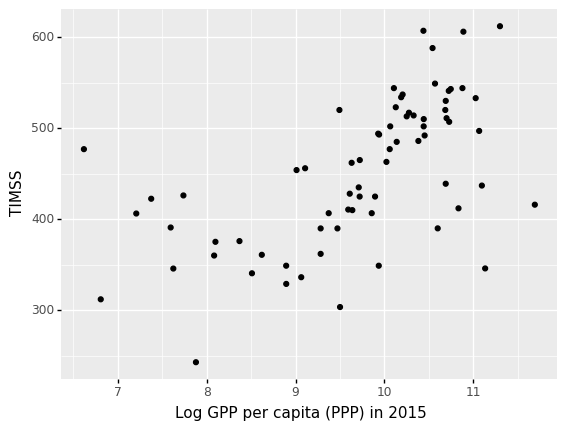

<ggplot: (149303011901)>

In [17]:
ggplot(data=TIMSS) +\
    geom_point(mapping=aes(x='log_GDP', y='TIMSS'))  +\
    labs(x = "Log GPP per capita (PPP) in 2015")

Αντίστοιχα για τον δείκτη *PIRLS*:

In [18]:
PIRLSna = PIRLS[PIRLS['PIRLS'].notna()] 

print('Pearson', stats.pearsonr(x=PIRLSna['PIRLS'], y=np.log(PIRLSna['GDP'])))
print('Spearman', stats.spearmanr(PIRLSna['PIRLS'], PIRLSna['log_GDP']))

Pearson (0.6762226118838529, 2.4787369620437173e-10)
Spearman SpearmanrResult(correlation=0.6764711507339786, pvalue=2.427725700137588e-10)


Η σχέση (log) GDP με PIRLS φαίνεται πως και εδώ είναι αύξουσα, και λίγο περισσότερο γραμμική από ότι η αντίστοιχη σχέση με τον TIMSS. Εδώ οι δύο δείκτες Pearson και Spearman έχουν περίπου τις ίδιες τιμές.  

C:\Users\apmou\Downloads\Mathesis\DataScience\venv\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 10 rows containing missing values.


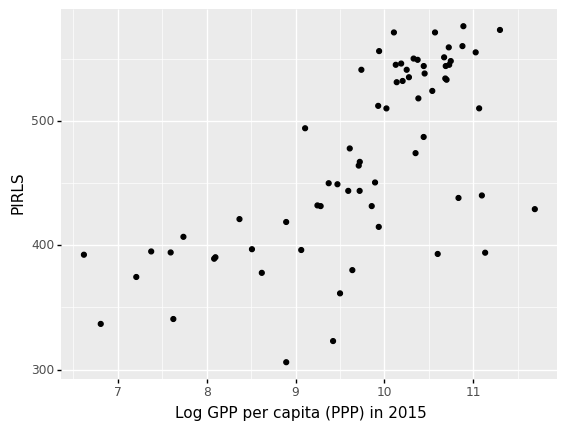

<ggplot: (149305197538)>

In [19]:
ggplot(data=PIRLS) +\
    geom_point(mapping=aes(x='log_GDP', y='PIRLS'))  +\
    labs(x = "Log GPP per capita (PPP) in 2015")

Θα μελετήσουμε τώρα λίγο περισσότερο τις παραπάνω σχέσεις μέσω παλιδρόμησης. Για τον δείκτη `TIMSS` θα έχουμε:

In [20]:
ols_TIMSS = smf.ols("TIMSS ~ np.log(GDP)", data=TIMSS)
ols_TIMSS_res = ols_TIMSS.fit()
ols_TIMSS_res.params

Intercept      46.117041
np.log(GDP)    41.745974
dtype: float64

Αυτό σημαίνει ότι η σχέση μεταξύ της μεταβλητής *TIMSS* ($y$) και της *log_GDP* ($x$) είναι:

$$ y = 46{,}117041 + 41{,}745974 x $$

Στο παρακάτω διάγραμμα φαίνεται και η συσχέτιση

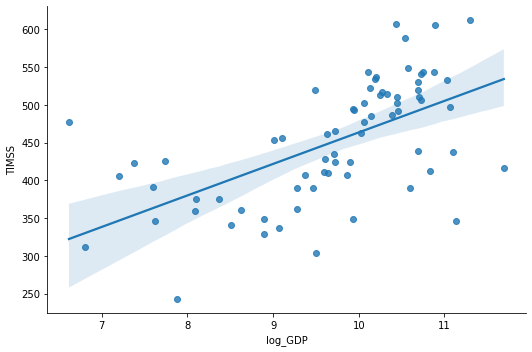

In [21]:
sns.lmplot(x='log_GDP', y='TIMSS', data=TIMSS, aspect=1.5)

Οι τιμές της παλινδρόμησης δείχνουν:

In [22]:
ols_TIMSS_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMSS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           5.07e-08
Time:                        08:40:25   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.1170     66.734      0.691      0.492     -87.013     179.247
np.log(GDP)    41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Η τιμή $R^2 = 0{,}352$ που παρατηρούμε σημαίνει ότι το μοντέλο μας εξηγεί το 35,2% της διακύμανσης (variation) του δείκτη TIMSS με βάση τον λογάριθμο του GDP. 


In [23]:
ols_TIMSS_res.rsquared

0.3516324716988275

Παρακάτω είναι το διάγραμμα υπολοίπων για τον δείκτη TIMSS:

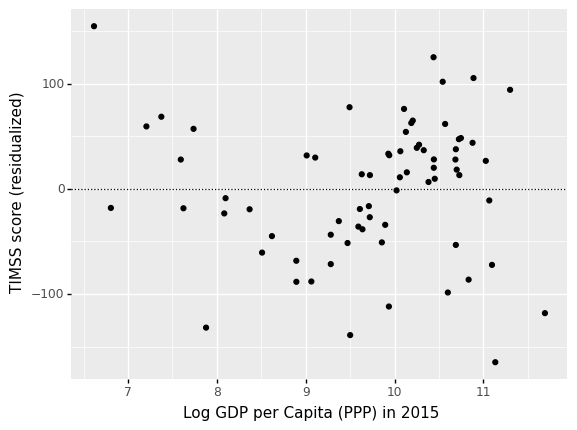

<ggplot: (149306037233)>

In [26]:
ggplot(data=TIMSSna) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x=TIMSSna['log_GDP'], y=ols_TIMSS_res.resid)) +\
    xlab('Log GDP per Capita (PPP) in 2015') +\
    ylab('TIMSS score (residualized)')

Θα μπορούσαμε πιο απλά να παράξουμε άμεσα το διάγραμμα με seaborn χωρίς να κάνουμε πρώτα την παλινδρόμηση (την κάνει το seaborn για μας)

<AxesSubplot:xlabel='log_GDP', ylabel='TIMSS'>

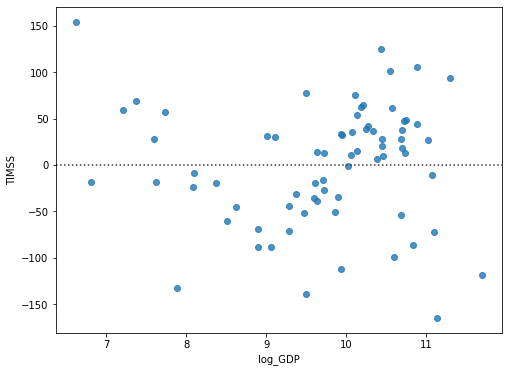

In [27]:
plt.figure(figsize=(8, 6))
sns.residplot(x='log_GDP', y='TIMSS', data=TIMSS)

Προσθέτουμε τα υπόλοιπα του δείκτη TIMSS στο dataframe *TIMSS* για αργότερα

In [28]:
TIMSS['TIMSSres'] = ols_TIMSS_res.resid
TIMSS

C:\Users\apmou\AppData\Local\Temp\ipykernel_12332\1998151157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country Code,TIMSS,GDP,log_GDP,TIMSSres
0,ARE,437.000000,65975.375547,11.097037,-72.373659
1,ARG,406.652557,19101.297392,9.857512,-50.975909
2,ARM,454.000000,8195.933650,9.011393,31.693559
3,AUS,520.000000,43719.502165,10.685550,27.804280
4,AUT,511.000000,44353.875214,10.699955,18.202895
...,...,...,...,...,...
73,TUR,477.000000,23388.481302,10.059999,10.918500
74,URY,424.912933,19831.445894,9.895024,-34.281533
75,USA,544.000000,53029.293361,10.878600,43.745211
76,YEM,243.000000,2641.045829,7.878930,-132.030663


Αντίστοιχα για τον δείκτη *PIRLS*:

In [29]:
ols_PIRLS = smf.ols("PIRLS ~ log_GDP", data=PIRLS)
ols_PIRLS_res = ols_PIRLS.fit()
ols_PIRLS_res.params

Intercept    42.619127
log_GDP      43.912415
dtype: float64

Δηλαδή η σχέση μεταξύ της μεταβλητής *PIRLS* ($y$) και της *log_GDP* ($x$) είναι:

$$ y = 42{,}619127 + 43{,}912415 x $$

Αντίστοιχα θα έχουμε για τον PIRLS:

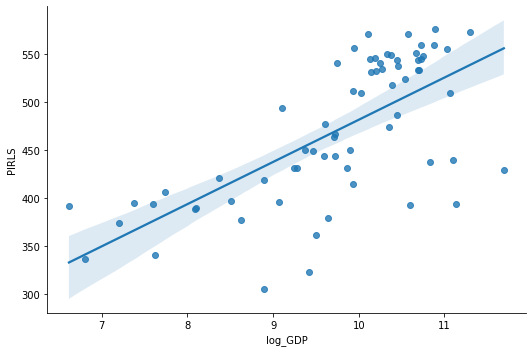

In [30]:
sns.lmplot(x='log_GDP', y='PIRLS', data=PIRLS, aspect=1.5)

In [31]:
ols_PIRLS_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PIRLS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           2.48e-10
Time:                        08:41:24   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.463     -72.762     158.000
log_GDP       43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

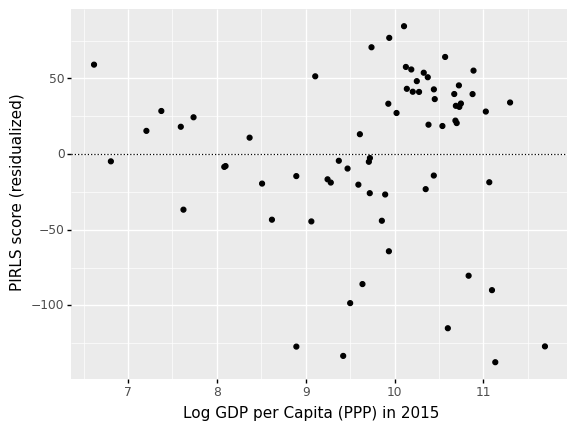

<ggplot: (149306125635)>

In [32]:
ggplot(data=PIRLSna) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x=PIRLSna['log_GDP'], y=ols_PIRLS_res.resid)) +\
    xlab('Log GDP per Capita (PPP) in 2015') +\
    ylab('PIRLS score (residualized)')

## E2: Χρόνια Εκπαίδευσης και Αποτελέσματα στα Τεστ

Θα δούμε τώρα τα αντίστοιχα γραφήματα των residualized τιμών των δεικτών σε σχέση με τα residualized data των ετών εκπαιδευσης. 

Αρχικά φορτώνουμε τα δεδομένα του αρχείου **BL2013_MF1599_v2.2.dta** σε ένα dataframe *DF3*. 

In [30]:
datafile_3 = 'BL2013_MF1599_v2.2.dta'
DF3 = pd.read_stata(datafile_3) 
DF3

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.0,Algeria,1950.0,MF,15.0,999.0,80.684593,17.563400,3.745905,1.454129,0.459588,0.297876,0.164790,0.846457,0.744399,0.092804,0.009253,5241.0,DZA,Middle East and North Africa
1,1.0,Algeria,1955.0,MF,15.0,999.0,81.050957,17.018442,3.464397,1.639253,0.495228,0.259414,0.141776,0.835015,0.728405,0.098586,0.008024,5699.0,DZA,Middle East and North Africa
2,1.0,Algeria,1960.0,MF,15.0,999.0,82.611153,14.313748,3.069391,2.752519,1.049408,0.322578,0.173414,0.880083,0.706000,0.164163,0.009920,6073.0,DZA,Middle East and North Africa
3,1.0,Algeria,1965.0,MF,15.0,999.0,80.931877,14.420929,4.006678,4.209821,1.791863,0.426420,0.226569,1.096061,0.831003,0.251998,0.013060,6374.0,DZA,Middle East and North Africa
4,1.0,Algeria,1970.0,MF,15.0,999.0,73.636833,19.217760,5.225636,6.686831,3.256895,0.344648,0.179372,1.554976,1.155191,0.389305,0.010480,7100.0,DZA,Middle East and North Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,358.0,Ukraine,1990.0,MF,15.0,999.0,5.785368,14.138213,11.648808,59.848248,41.504124,20.228174,12.362464,9.531308,4.706372,4.173123,0.651813,40770.0,UKR,Europe and Central Asia
1894,358.0,Ukraine,1995.0,MF,15.0,999.0,4.284995,10.039333,8.426095,58.694180,40.753365,26.981485,16.553701,10.154778,4.886407,4.397667,0.870704,40989.0,UKR,Europe and Central Asia
1895,358.0,Ukraine,2000.0,MF,15.0,999.0,2.861569,9.811013,7.551663,53.745895,36.992371,33.192432,20.433352,10.453713,4.977168,4.404029,1.072516,40332.0,UKR,Europe and Central Asia
1896,358.0,Ukraine,2005.0,MF,15.0,999.0,1.898582,6.847359,5.919780,54.743999,39.278564,36.510059,22.327957,10.967577,5.042674,4.748143,1.176760,39573.0,UKR,Europe and Central Asia


Το dataset περιέχει πληροφορίες ανα 5ετια από το 1950 μέχρι το 2010, για τα χρόνια της εκπαίδευσης ανά χώρα (και συνολικά και ανά βαθμίδα). Σύμφωνα με την εκφώνηση της εργασίας θα χρησιμοποιηθούν οι τιμές για το 2010

In [31]:
DF3 = DF3[DF3['year'] == 2010]
DF3

#DF3 = DF3.groupby(['WBcode']).mean().reset_index()
#DF3

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
12,1.0,Algeria,2010.0,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010.0,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010.0,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010.0,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010.0,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,326.0,Republic of Moldova,2010.0,MF,15.0,999.0,0.976749,6.086153,3.653862,78.326561,54.266289,14.610540,8.756674,10.404020,3.912284,6.024392,0.467344,2982.0,ROM,Europe and Central Asia
1858,329.0,Serbia,2010.0,MF,15.0,999.0,2.960607,8.992959,7.690698,73.507530,48.711517,14.538917,8.968564,10.845333,6.029522,4.345661,0.470150,8667.0,SER,Europe and Central Asia
1871,331.0,Slovenia,2010.0,MF,15.0,999.0,0.657998,3.077496,2.661207,76.408531,56.119919,19.855972,13.252562,11.890487,6.387317,4.841000,0.662170,1700.0,SVN,Europe and Central Asia
1884,342.0,"China, Macao Special Administrative Region",2010.0,MF,15.0,999.0,3.457963,21.363201,16.163477,58.113544,32.111195,17.065292,10.434196,8.543072,4.873250,3.119832,0.549990,416.0,MAC,East Asia and the Pacific


Ενώνοντας το προηγούμενο dataframe DF1 του ερωτήματος Ε1 με το DF3 στην στήλη *WBcode* θα πάρουμε το dataframe *DFjoin* που θα χρησιμοποιήσουμε για τα επόμενα βήματα. Για να γίνει το join θα μετονομάσουμε την στήλη **Country Code** του DF1 σε **WBCode**

In [32]:
DF1.rename(columns = {'Country Code':'WBcode'}, inplace = True)
DFjoin = DF3.merge(DF1, on=['WBcode']) 
DFjoin

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,...,region_code,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,Country Name,Series Name,Series Code,GDP
0,3.0,Benin,2010.0,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,...,Sub-Saharan Africa,Benin,35.0,35.000000,390.949188,394.196686,Benin,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1987.16714645212
1,4.0,Botswana,2010.0,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,...,Sub-Saharan Africa,Botswana,NaN,NaN,410.000000,380.000000,Botswana,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,15356.457617167
2,6.0,Burundi,2010.0,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,...,Sub-Saharan Africa,Burundi,91.0,43.000000,476.978455,392.374207,Burundi,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,748.41527127932
3,7.0,Cameroon,2010.0,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,...,Sub-Saharan Africa,Cameroon,41.0,46.000000,375.240479,390.343994,Cameroon,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3289.06454559229
4,12.0,Congo,2010.0,MF,15.0,999.0,27.482744,25.528748,6.374999,45.519726,...,Sub-Saharan Africa,Congo,41.0,40.000000,360.963776,377.811646,"Congo, Rep.","GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,5542.89298198573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,312.0,Kazakhstan,2010.0,MF,15.0,999.0,0.050215,3.618378,2.091560,72.905495,...,Europe and Central Asia,Kazakhstan,88.0,NaN,502.000000,NaN,Kazakhstan,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,23522.2905211907
68,318.0,Qatar,2010.0,MF,15.0,999.0,3.592868,42.142494,18.475492,37.819698,...,Middle East and North Africa,Qatar,55.0,59.669598,416.000000,429.000000,Qatar,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,119749.428536152
69,322.0,Croatia,2010.0,MF,15.0,999.0,1.800266,8.333059,7.314547,72.290146,...,Europe and Central Asia,Croatia,90.0,98.999435,493.000000,556.000000,Croatia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,20759.0481463138
70,325.0,Lithuania,2010.0,MF,15.0,999.0,0.000000,10.114531,8.853948,64.440605,...,Europe and Central Asia,Lithuania,96.0,96.533295,537.000000,532.000000,Lithuania,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,27045.713019289


In [33]:
DFjoin.columns

Index(['BLcode', 'country', 'year', 'sex', 'agefrom', 'ageto', 'lu', 'lp',
       'lpc', 'ls', 'lsc', 'lh', 'lhc', 'yr_sch', 'yr_sch_pri', 'yr_sch_sec',
       'yr_sch_ter', 'pop', 'WBcode', 'region_code', 'Country',
       'Percent Above Math Benchmark (400 on TIMSS Scale)',
       'Percent Above Reading Benchmark (400 on PIRLS Scale)', 'TIMSS',
       'PIRLS', 'Country Name', 'Series Name', 'Series Code', 'GDP'],
      dtype='object')

Θα αλλάξουμε την στήλη *GDP* του dataframe *DFjoin* σε float για να μπορέσουμε να πάρουμε τον λογάριθμό του:

In [34]:
DFjoin['GDP'] = DFjoin['GDP'].astype(float, errors = 'raise')
DFjoin['log_GDP'] = np.log(DFjoin['GDP'])
DFjoin

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,...,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,Country Name,Series Name,Series Code,GDP,log_GDP
0,3.0,Benin,2010.0,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,...,Benin,35.0,35.000000,390.949188,394.196686,Benin,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1987.167146,7.594465
1,4.0,Botswana,2010.0,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,...,Botswana,NaN,NaN,410.000000,380.000000,Botswana,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,15356.457617,9.639291
2,6.0,Burundi,2010.0,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,...,Burundi,91.0,43.000000,476.978455,392.374207,Burundi,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,748.415271,6.617958
3,7.0,Cameroon,2010.0,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,...,Cameroon,41.0,46.000000,375.240479,390.343994,Cameroon,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3289.064546,8.098358
4,12.0,Congo,2010.0,MF,15.0,999.0,27.482744,25.528748,6.374999,45.519726,...,Congo,41.0,40.000000,360.963776,377.811646,"Congo, Rep.","GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,5542.892982,8.620272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,312.0,Kazakhstan,2010.0,MF,15.0,999.0,0.050215,3.618378,2.091560,72.905495,...,Kazakhstan,88.0,NaN,502.000000,NaN,Kazakhstan,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,23522.290521,10.065704
68,318.0,Qatar,2010.0,MF,15.0,999.0,3.592868,42.142494,18.475492,37.819698,...,Qatar,55.0,59.669598,416.000000,429.000000,Qatar,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,119749.428536,11.693157
69,322.0,Croatia,2010.0,MF,15.0,999.0,1.800266,8.333059,7.314547,72.290146,...,Croatia,90.0,98.999435,493.000000,556.000000,Croatia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,20759.048146,9.940737
70,325.0,Lithuania,2010.0,MF,15.0,999.0,0.000000,10.114531,8.853948,64.440605,...,Lithuania,96.0,96.533295,537.000000,532.000000,Lithuania,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,27045.713019,10.205284


Και θα κρατήσουμε τις στήλες που μας ενδιαφέρουν. 

In [35]:
DFx = DFjoin[['yr_sch','TIMSS','PIRLS','log_GDP']]
DFx

,yr_sch,TIMSS,PIRLS,log_GDP
0,4.430164,390.949188,394.196686,7.594465
1,9.554915,410.000000,380.000000,9.639291
2,3.346481,476.978455,392.374207,6.617958
3,6.154877,375.240479,390.343994,8.098358
4,5.941449,360.963776,377.811646,8.620272
...,...,...,...,...
67,11.326516,502.000000,NaN,10.065704
68,8.432807,416.000000,429.000000,11.693157
69,11.296732,493.000000,556.000000,9.940737
70,10.894826,537.000000,532.000000,10.205284


Τώρα στο dataframe DFx έχουμε τις τιμές των δεικτών TIMSS, PIRLS, log_GDP όπως πριν και επιπλέον τη στήλη *yr_sch* που είναι ο μέσος όρος των χρόνων παρακολούθησης στο σχολείο για όλες τις βαθμίδες εκπαίδευσης για κάθε χώρα (έτος 2010).  

Θα προχωρήσουμε σε μια παλινδρόμηση της μεταβλητής *yr_sch* με το *log_GDP*:

In [36]:
ols_yr_sch = smf.ols("yr_sch ~ log_GDP", data=DFx)
ols_yr_sch_res = ols_yr_sch.fit()
ols_yr_sch_res.params

Intercept   -10.130974
log_GDP       1.959388
dtype: float64

In [37]:
ols_yr_sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     110.6
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           4.74e-16
Time:                        23:49:01   Log-Likelihood:                -138.89
No. Observations:                  72   AIC:                             281.8
Df Residuals:                      70   BIC:                             286.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1310      1.838     -5.512      0.000     -13.797      -6.465
log_GDP        1.9594      0.186     10.515      0.000       1.588       2.331
==============================================================================
Omnibus:                        8.402   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.855
Skew:                          -0.724   Prob(JB):                       0.0197
Kurtosis:                       3.723   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Από το $R^2$ βλέπουμε πως το 61,2% του χρόνου παρακολούθησης συνολικά στην εκπαίδευση εξηγείται από το log_GDP. 

Τα υπόλοιπα των ετών εκπαιδευσης σε σχέση με την log_GDP αντιστοιχούν στα χρόνια της εκπαίδευσης που δεν μπορούν να εξηγηθούν από το εισόδημα. Προσθέτουμε τα υπόλοιπα από την παλινδρόμηση αυτή στο dataframe DFx:

In [38]:
DFx['yr_sch_resid'] = ols_yr_sch_res.resid
DFx

C:\Users\apmou\AppData\Local\Temp\ipykernel_13896\3030522174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,yr_sch,TIMSS,PIRLS,log_GDP,yr_sch_resid
0,4.430164,390.949188,394.196686,7.594465,-0.319368
1,9.554915,410.000000,380.000000,9.639291,0.798774
2,3.346481,476.978455,392.374207,6.617958,0.510305
3,6.154877,375.240479,390.343994,8.098358,0.418022
4,5.941449,360.963776,377.811646,8.620272,-0.818037
...,...,...,...,...,...
67,11.326516,502.000000,NaN,10.065704,1.734868
68,8.432807,416.000000,429.000000,11.693157,-4.347654
69,11.296732,493.000000,556.000000,9.940737,1.949941
70,10.894826,537.000000,532.000000,10.205284,1.029686


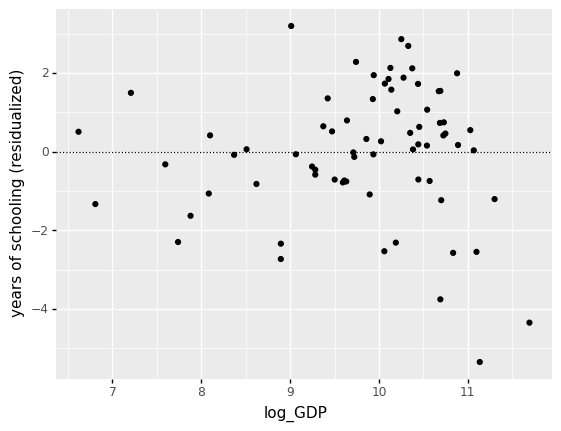

<ggplot: (144651947120)>

In [39]:
ggplot(data=DFx) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x=DFx['log_GDP'], y=DFx['yr_sch_resid'])) +\
    ylab('years of schooling (residualized)')

Αντίστοιχα θα προσθέσουμε και τα υπόλοιπα των TIMSS και PIRLS σε σχέση με την log_GDP:

In [40]:
ols_TIMSS = smf.ols("TIMSS ~ log_GDP", data=DFx)
ols_TIMSS_res = ols_TIMSS.fit()
ols_TIMSS_res.params

Intercept    14.541815
log_GDP      44.861970
dtype: float64

In [41]:
ols_TIMSS_res.rsquared

0.3728664974834546

In [42]:
DFx['TIMSS_resid'] = ols_TIMSS_res.resid
DFx

C:\Users\apmou\AppData\Local\Temp\ipykernel_13896\1613941768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,yr_sch,TIMSS,PIRLS,log_GDP,yr_sch_resid,TIMSS_resid
0,4.430164,390.949188,394.196686,7.594465,-0.319368,35.704693
1,9.554915,410.000000,380.000000,9.639291,0.798774,-36.979419
2,3.346481,476.978455,392.374207,6.617958,0.510305,165.542004
3,6.154877,375.240479,390.343994,8.098358,0.418022,-2.609655
4,5.941449,360.963776,377.811646,8.620272,-0.818037,-40.300420
...,...,...,...,...,...,...
67,11.326516,502.000000,NaN,10.065704,1.734868,35.890879
68,8.432807,416.000000,429.000000,11.693157,-4.347654,-123.119867
69,11.296732,493.000000,556.000000,9.940737,1.949941,32.497114
70,10.894826,537.000000,532.000000,10.205284,1.029686,64.629045


In [43]:
ols_PIRLS = smf.ols("PIRLS ~ log_GDP", data=DFx)
ols_PIRLS_res = ols_PIRLS.fit()
ols_PIRLS_res.params

Intercept    28.813359
log_GDP      45.439154
dtype: float64

In [44]:
ols_PIRLS_res.rsquared

0.4628207983371634

In [45]:
DFx['PIRLS_resid'] = ols_PIRLS_res.resid
DFx

C:\Users\apmou\AppData\Local\Temp\ipykernel_13896\3378500748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,yr_sch,TIMSS,PIRLS,log_GDP,yr_sch_resid,TIMSS_resid,PIRLS_resid
0,4.430164,390.949188,394.196686,7.594465,-0.319368,35.704693,20.297242
1,9.554915,410.000000,380.000000,9.639291,0.798774,-36.979419,-86.814608
2,3.346481,476.978455,392.374207,6.617958,0.510305,165.542004,62.846431
3,6.154877,375.240479,390.343994,8.098358,0.418022,-2.609655,-6.451927
4,5.941449,360.963776,377.811646,8.620272,-0.818037,-40.300420,-42.699578
...,...,...,...,...,...,...,...
67,11.326516,502.000000,NaN,10.065704,1.734868,35.890879,NaN
68,8.432807,416.000000,429.000000,11.693157,-4.347654,-123.119867,-131.140515
69,11.296732,493.000000,556.000000,9.940737,1.949941,32.497114,75.487935
70,10.894826,537.000000,532.000000,10.205284,1.029686,64.629045,39.467174


Στην τελική του μορφή, το dataframe DFx έχει και τα υπόλοιπα των παλινδρομήσεων των yr_sch, TIMSS και PIRLS με την log_GDP. Στα παρακάτω γραφήματα μπορούμε να δούμε την σχέση των υπολοίπων μεταξύ τους:

C:\Users\apmou\Downloads\Mathesis\DataScience\venv\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


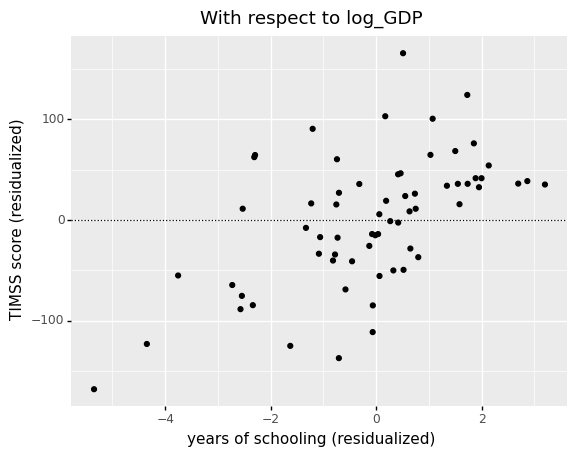

<ggplot: (144652676340)>

In [64]:
ggplot(data=DFx)                                                         +\
    geom_hline(yintercept=0, color='black', linetype='dotted')           +\
    geom_point(mapping=aes(x=DFx['yr_sch_resid'], y=DFx['TIMSS_resid'])) +\
    ggtitle('With respect to log_GDP')                                   +\
    xlab('years of schooling (residualized)')                            +\
    ylab('TIMSS score (residualized)')


C:\Users\apmou\Downloads\Mathesis\DataScience\venv\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


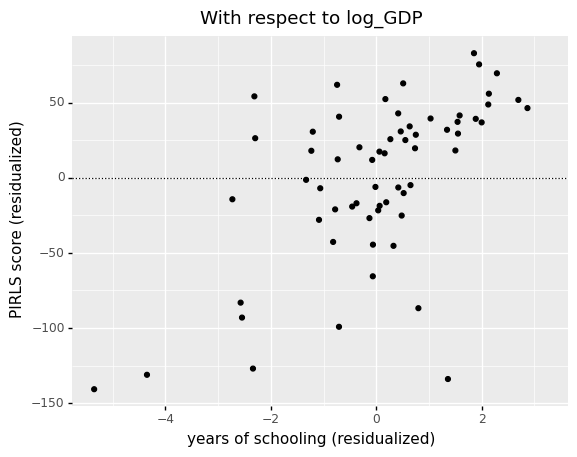

<ggplot: (144652741136)>

In [65]:
ggplot(data=DFx)                                                         +\
    geom_hline(yintercept=0, color='black', linetype='dotted')           +\
    geom_point(mapping=aes(x=DFx['yr_sch_resid'], y=DFx['PIRLS_resid'])) +\
     ggtitle('With respect to log_GDP')                                  +\
    xlab('years of schooling (residualized)')                            +\
    ylab('PIRLS score (residualized)')

Θα δούμε τώρα την ανάλυση των υπολοίπων των δεικτών TIMSS και PIRLS και των υπολοίπων των ετών εκπαίδευσης

In [48]:
ols_TIMSS_sch = smf.ols("TIMSS_resid ~ yr_sch_resid", data=DFx)
ols_TIMSS_sch_res = ols_TIMSS_sch.fit()
ols_TIMSS_sch_res.params

Intercept        2.521476
yr_sch_resid    21.630528
dtype: float64

In [55]:
ols_TIMSS_sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TIMSS_resid   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     29.61
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           9.23e-07
Time:                        23:49:56   Log-Likelihood:                -350.49
No. Observations:                  65   AIC:                             705.0
Df Residuals:                      63   BIC:                             709.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.5215      6.713      0.376      0.708     -10.894      15.937
yr_sch_resid    21.6305      3.975      5.441      0.000      13.686      29.575
==============================================================================
Omnibus:                        3.891   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.973
Skew:                           0.442   Prob(JB):                        0.226
Kurtosis:                       3.561   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
ols_PIRLS_sch = smf.ols("PIRLS_resid ~ yr_sch_resid", data=DFx)
ols_PIRLS_sch_res = ols_PIRLS_sch.fit()
ols_PIRLS_sch_res.params

Intercept       -0.486729
yr_sch_resid    20.247494
dtype: float64

In [56]:
ols_PIRLS_sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PIRLS_resid   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     33.98
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.26e-07
Time:                        23:50:12   Log-Likelihood:                -326.34
No. Observations:                  63   AIC:                             656.7
Df Residuals:                      61   BIC:                             661.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.4867      5.505     -0.088      0.930     -11.495      10.522
yr_sch_resid    20.2475      3.473      5.830      0.000      13.302      27.193
==============================================================================
Omnibus:                       14.298   Durbin-Watson:                   2.325
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.590
Skew:                          -0.831   Prob(JB):                     3.38e-05
Kurtosis:                       5.255   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Βλέπουμε πως το $R^2$ είναι 32% για τον δείκτη TIMSS και 35,8% για τον δείκτη PIRLS. 

Στο νέο dataframe DFnew που θα δημιουργήσουμε πιο κάτω, θα προσθέσουμε και τις στήλες TIMSS_sch_resid και PRILS_sch_resid με τις τιμές των υπολοίπων των δεικτών TIMSS και PIRLS από την παλινδρόμηση με τα υπόλοιπα των ετών παρακολούθησης στην εκπαίδευση. 

In [57]:
DFnew = DFx.copy()
DFnew

,yr_sch,TIMSS,PIRLS,log_GDP,yr_sch_resid,TIMSS_resid,PIRLS_resid
0,4.430164,390.949188,394.196686,7.594465,-0.319368,35.704693,20.297242
1,9.554915,410.000000,380.000000,9.639291,0.798774,-36.979419,-86.814608
2,3.346481,476.978455,392.374207,6.617958,0.510305,165.542004,62.846431
3,6.154877,375.240479,390.343994,8.098358,0.418022,-2.609655,-6.451927
4,5.941449,360.963776,377.811646,8.620272,-0.818037,-40.300420,-42.699578
...,...,...,...,...,...,...,...
67,11.326516,502.000000,NaN,10.065704,1.734868,35.890879,NaN
68,8.432807,416.000000,429.000000,11.693157,-4.347654,-123.119867,-131.140515
69,11.296732,493.000000,556.000000,9.940737,1.949941,32.497114,75.487935
70,10.894826,537.000000,532.000000,10.205284,1.029686,64.629045,39.467174


In [58]:
DFnew['TIMSS_resid_yr_sch'] = ols_TIMSS_sch_res.resid

In [59]:
DFnew['PIRLS_resid_yr_sch'] = ols_PIRLS_sch_res.resid
DFnew

,yr_sch,TIMSS,PIRLS,log_GDP,yr_sch_resid,TIMSS_resid,PIRLS_resid,TIMSS_resid_yr_sch,PIRLS_resid_yr_sch
0,4.430164,390.949188,394.196686,7.594465,-0.319368,35.704693,20.297242,40.091325,27.250382
1,9.554915,410.000000,380.000000,9.639291,0.798774,-36.979419,-86.814608,-56.778806,-102.501059
2,3.346481,476.978455,392.374207,6.617958,0.510305,165.542004,62.846431,151.982351,53.000753
3,6.154877,375.240479,390.343994,8.098358,0.418022,-2.609655,-6.451927,-14.173159,-14.429088
4,5.941449,360.963776,377.811646,8.620272,-0.818037,-40.300420,-42.699578,-25.127326,-25.649651
...,...,...,...,...,...,...,...,...,...
67,11.326516,502.000000,NaN,10.065704,1.734868,35.890879,NaN,-4.156697,NaN
68,8.432807,416.000000,429.000000,11.693157,-4.347654,-123.119867,-131.140515,-31.599292,-42.624685
69,11.296732,493.000000,556.000000,9.940737,1.949941,32.497114,75.487935,-12.202612,36.493248
70,10.894826,537.000000,532.000000,10.205284,1.029686,64.629045,39.467174,39.834920,19.105344


C:\Users\apmou\Downloads\Mathesis\DataScience\venv\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


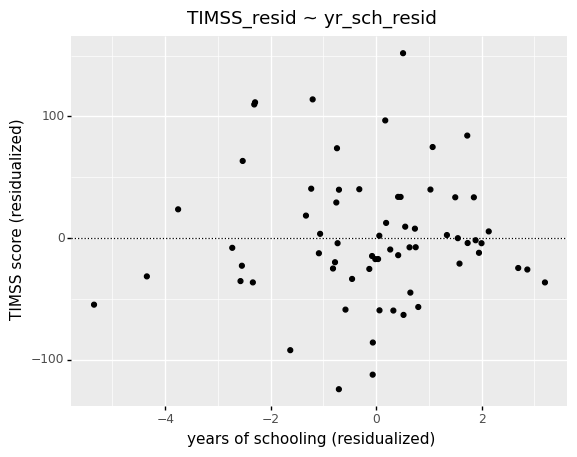

<ggplot: (144652765007)>

In [66]:
ggplot(data=DFnew)                                                                  +\
    geom_hline(yintercept=0, color='black', linetype='dotted')                      +\
    geom_point(mapping=aes(x=DFnew['yr_sch_resid'], y=DFnew['TIMSS_resid_yr_sch'])) +\
    ggtitle('TIMSS_resid ~ yr_sch_resid')                                           +\
    xlab('years of schooling (residualized)')                                       +\
    ylab('TIMSS score (residualized)')

C:\Users\apmou\Downloads\Mathesis\DataScience\venv\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


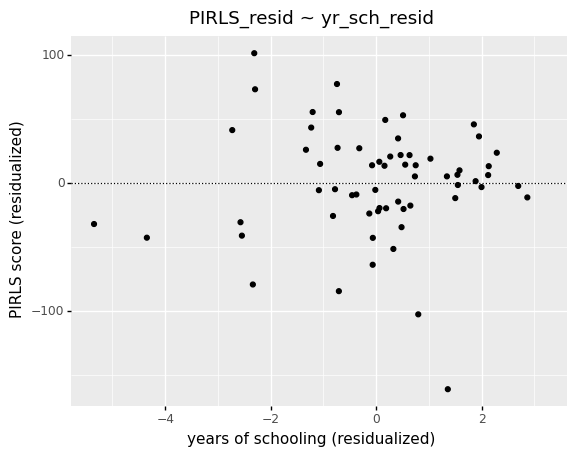

<ggplot: (144652786393)>

In [67]:
ggplot(data=DFnew)                                                                  +\
    geom_hline(yintercept=0, color='black', linetype='dotted')                      +\
    geom_point(mapping=aes(x=DFnew['yr_sch_resid'], y=DFnew['PIRLS_resid_yr_sch'])) +\
    ggtitle('PIRLS_resid ~ yr_sch_resid')                                           +\
    xlab('years of schooling (residualized)')                                       +\
    ylab('PIRLS score (residualized)')